# 401k vs Roth

In [116]:
current_salary = 80000.
initial_balance = 0.
max_yearly_contribution_less_50 = 19500.
max_yearly_contribution_more_50 = 19500. + 6500. # catch up contribution
age_at_start = 40
retirement_age = 67 # age vested, full retirement age in USA
employer_contribution_percent = 6/100 # percent
SP500_rate = 12/100 # percent
tax_rate = 29/100 # percent
yearly_salary_increase = 2/100 # percent
current_salary*employer_contribution_percent

4800.0

In [117]:
using DataFrames
df = DataFrame( Year = Int64[], amount401k = Float64[], amountRoth = Float64[]) # create empty DataFrame

amount401k = initial_balance
amountRoth = initial_balance
max_contribution = max_yearly_contribution_less_50
salary = current_salary

for year in age_at_start:retirement_age
    
    if year > 50 
        max_contribution = max_yearly_contribution_more_50
    end
    
    # yearly salary increase
    salary = salary + (salary*yearly_salary_increase)
    employer_contribution = salary*employer_contribution_percent
    
    for pay in 1:24 # each year has 24 pay periods
        # every year we accumulate average "market" percentage in growth
        amount401k = amount401k + (amount401k*SP500_rate/24)
        amountRoth = amountRoth + (amountRoth*SP500_rate/24)

        # every year we add maximum yearly contributons
        amount401k = amount401k + max_contribution/24
        amountRoth = amountRoth + max_contribution/24

        # every year the employer adds their contribution

        amount401k = amount401k + employer_contribution/24
        amountRoth = amountRoth + employer_contribution/24
    end
    
    push!(df, [year  amount401k amountRoth]) # add new data to theDataFrame
end

first(df, 40)

,Year,amount401k,amountRoth
,Int64,Float64,Float64
1,40,25851.6,25851.6
2,41,55094.2,55094.2
3,42,88161.2,88161.2
4,43,125541.0,125541.0
5,44,167784.0,167784.0
6,45,215511.0,215511.0
7,46,269421.0,269421.0
8,47,330304.0,330304.0
9,48,399047.0,399047.0


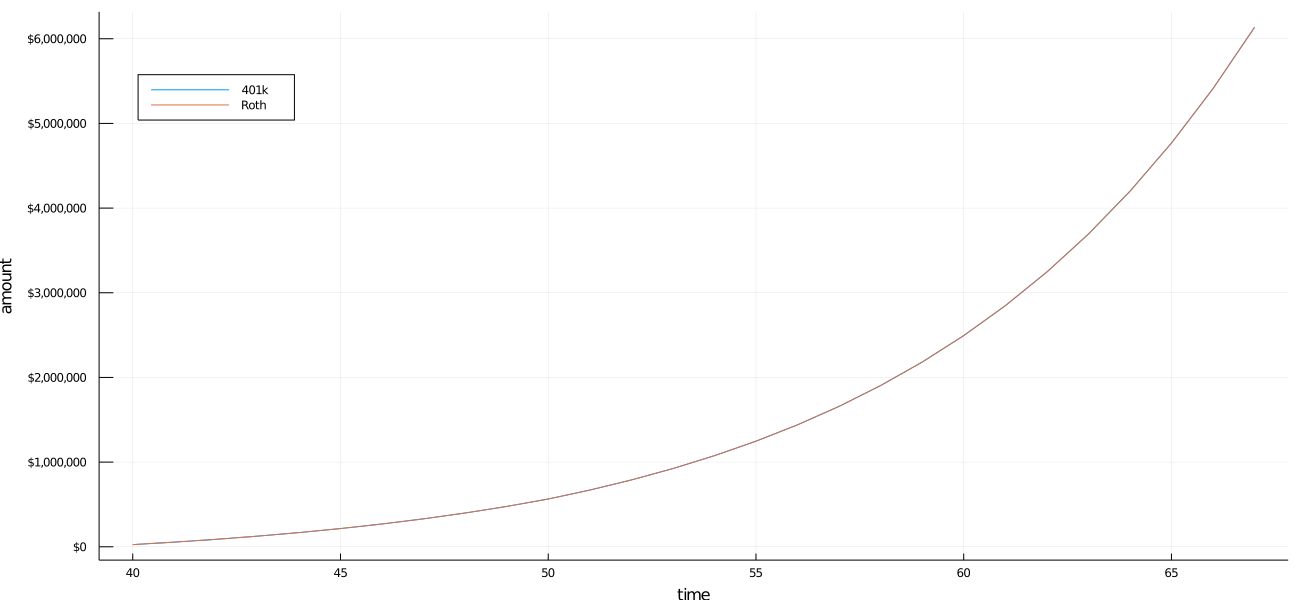

In [118]:
using Formatting
using Plots
gr()
plot(df[:,1], 
    [df[:,2]  df[:,3] ], 
    label    = ["401k" "Roth"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "amount",
    size     = (1300, 600), # width, height
    #yformatter = :plain, # or scientific
    yformatter = yi -> string("\$", format( yi, commas=true )), # e.g. $2,000,000
    layout = (1, 1)
    )

In [111]:
savefig("401k.png") 